<Figure size 1000x700 with 0 Axes>

TCLab version 1.0.0
Arduino Leonardo connected on port COM5 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
Connected to TCLab.
Initial Temperature T1: 26.15 degC


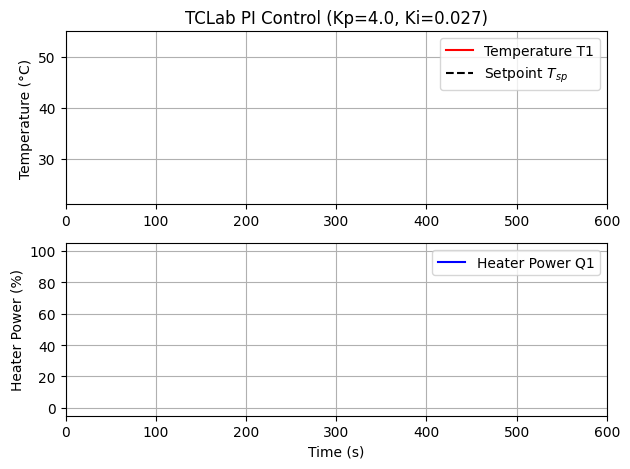

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

An error occurred: WriteFile failed (PermissionError(13, 'The device does not recognize the command.', None, 22))
Ensuring connection is closed.


In [5]:
import tclab
import time
import numpy as np
import matplotlib.pyplot as plt # Import for plotting

# --- 1. PI Controller Parameters (Kp and Ki) ---
# Proportional Gain (Kp)
Kp = 4.0
# Integral Gain (Ki) - (Equivalent to Kc / tau_I)
Ki = 4.0 / 150.0 
# Bias value (The steady-state heater power required for T1 at ambient conditions)
OP_bias = 0.0
# Setpoint temperature (degC)
T_sp = 50.0
# Control interval (seconds)
delta_t = 2.0
# Total duration of the control run (seconds)
duration = 600.0 # Increased duration for a better visualization

# --- 2. Setup Variables and Data Logging ---
# Number of control steps
n = int(duration / delta_t)
# Arrays for data logging
t = np.zeros(n)
T1 = np.zeros(n)
T_sp_array = np.zeros(n)
Q1 = np.zeros(n)
integral_error = 0.0

# --- 3. Initialize Plotting ---
plt.figure(figsize=(10, 7))
plt.ion() # Turn on interactive mode for live updates
plt.show()

# Configure the Temperature Subplot
ax1 = plt.subplot(2, 1, 1)
ax1.set_ylabel('Temperature (°C)')
line1, = ax1.plot(t, T1, 'r-', label='Temperature T1')
line_sp, = ax1.plot(t, T_sp_array, 'k--', label='Setpoint $T_{sp}$')
ax1.legend(loc='best')
ax1.set_xlim([0, duration])
ax1.set_ylim([np.floor(T1_initial), T_sp + 5.0]) # Set Y-limit based on initial T and T_sp
ax1.grid()
plt.title(f'TCLab PI Control (Kp={Kp}, Ki={Ki:.3f})')

# Configure the Heater Power Subplot
ax2 = plt.subplot(2, 1, 2)
ax2.set_ylabel('Heater Power (%)')
ax2.set_xlabel('Time (s)')
line2, = ax2.plot(t, Q1, 'b-', label='Heater Power Q1')
ax2.legend(loc='best')
ax2.set_xlim([0, duration])
ax2.set_ylim([-5, 105])
ax2.grid()
plt.tight_layout()

# --- 4. Connect to TCLab ---
try:
    lab = tclab.TCLab()
    print("Connected to TCLab.")

    lab.Q1(0)
    lab.Q2(0)
    lab.LED(100)

    T1_initial = lab.T1
    ax1.set_ylim([T1_initial - 5.0, T_sp + 5.0]) # Refine Y-limit after getting T1_initial
    print(f"Initial Temperature T1: {T1_initial:.2f} degC")

    # --- 5. Main Control Loop ---
    for i in range(n):
        # Time logging
        t[i] = i * delta_t

        # Read temperature T1
        T1[i] = lab.T1
        T_sp_array[i] = T_sp

        # Calculate error
        error = T_sp - T1[i]

        # Calculate Proportional term
        P_term = Kp * error

        # Update Integral Error (Summation of error * delta_t)
        integral_error += error * delta_t 

        # Calculate Integral term
        I_term = Ki * integral_error

        # Calculate Controller Output (OP)
        OP = OP_bias + P_term + I_term

        # --- Anti-Windup (Clamping) ---
        Q1[i] = np.clip(OP, 0.0, 100.0)

        # Apply the output to the heater
        lab.Q1(Q1[i])

        # **Important Anti-Windup Logic:**
        if not (0.0 < Q1[i] < 100.0): # Simplified check for clamping
            integral_error -= error * delta_t 
        
        # --- Update the Plot (REAL-TIME) ---
        # Update the data for the two lines
        line1.set_data(t[0:i+1], T1[0:i+1])
        line_sp.set_data(t[0:i+1], T_sp_array[0:i+1])
        line2.set_data(t[0:i+1], Q1[0:i+1])
        
        # Re-scale the y-axis for T1 if needed (dynamic scaling)
        if T1[i] > ax1.get_ylim()[1] or T1[i] < ax1.get_ylim()[0]:
            ax1.set_ylim([np.min(T1[0:i+1]) - 5, np.max(T1[0:i+1]) + 5])
            
        plt.draw() # Redraw the figure
        plt.pause(0.05) # Pause briefly to update the plot window (0.05s)

        # Wait for the next control cycle (Total time spent in loop is delta_t)
        time.sleep(delta_t - 0.05) # Sleep for remaining time after plotting

    # --- 6. Final Shutdown ---
    print("Run complete. Turning off heaters.")

except Exception as e:
    print(f"An error occurred: {e}")

finally: 
    # Ensure connection is closed and heaters are off regardless of error
    print("Ensuring connection is closed.")
    try:
        lab.Q1(0) 
        lab.close()
    except:
        pass
    
    # Keep the final plot window open until the user closes it
    plt.ioff()
    plt.show()

